# Importing Stryde files to ObsPy

Tested with Python 3.11, ObsPy 1.4

In [1]:
from strypy import read_stryde

         network: 1
         station: 201
        location: 
         channel: GHZ
       starttime: 2022-12-15T11:00:00.000000Z
         endtime: 2022-12-15T12:01:27.998000Z
   sampling_rate: 500.0
           delta: 0.002
            npts: 1844000
           calib: 1.0


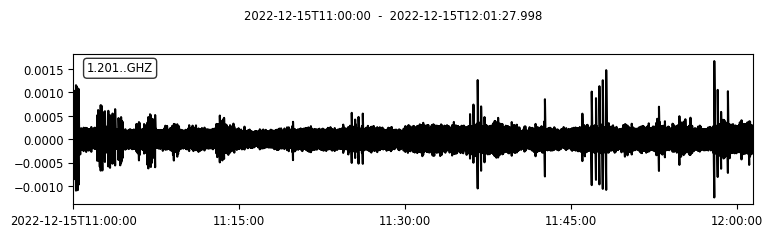

In [2]:
# Generic file reader
stream = read_stryde('example.segd')
print(stream[0].stats)
stream.plot();

         network: 1
         station: 201
        location: 
         channel: GHZ
       starttime: 2022-12-15T11:15:00.000000Z
         endtime: 2022-12-15T11:30:00.000000Z
   sampling_rate: 500.0
           delta: 0.002
            npts: 450001
           calib: 1.0
      processing: ['ObsPy 1.4.0: trim(endtime=None::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2022, 12, 15, 11, 15))', 'ObsPy 1.4.0: trim(endtime=UTCDateTime(2022, 12, 15, 11, 30)::fill_value=None::nearest_sample=True::pad=False::starttime=None)']


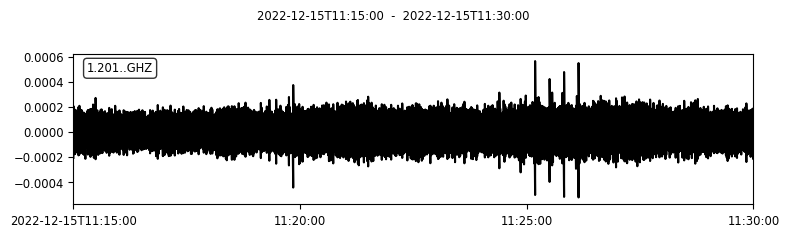

In [3]:
# Trim start and end times
from obspy import UTCDateTime
starttime = UTCDateTime("2022-12-15T11:15:00")
endtime = UTCDateTime("2022-12-15T11:30:00")

stream = read_stryde('example.segd', starttime=starttime, endtime=endtime)

print(stream[0].stats)
stream.plot();

         network: 1
         station: 201
        location: 
         channel: GHZ
       starttime: 2022-12-15T11:15:00.000000Z
         endtime: 2022-12-15T11:30:00.000000Z
   sampling_rate: 500.0
           delta: 0.002
            npts: 450001
           calib: 1.0
      processing: ['ObsPy 1.4.0: trim(endtime=None::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2022, 12, 15, 11, 15))', 'ObsPy 1.4.0: trim(endtime=UTCDateTime(2022, 12, 15, 11, 30)::fill_value=None::nearest_sample=True::pad=False::starttime=None)']


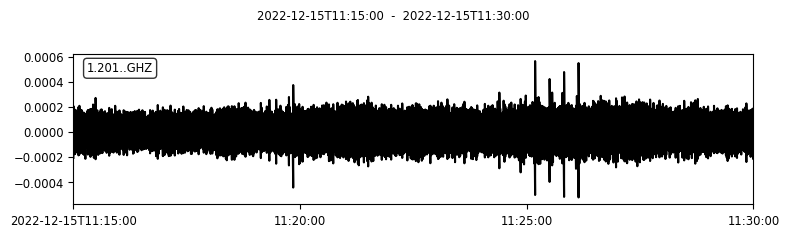

In [4]:
# Get the full headers for the file
general_header, scan_header, json_header, trace_header, stream = read_stryde('example.segd', starttime=starttime, endtime=endtime, stryde_headers=True)
print(stream[0].stats)
stream.plot();

In [5]:
# sesimc header is always #1
scan_header[1]

OrderedDict([('channel_set_number', 1),
             ('channel_type', 'Seis'),
             ('start_time', 0),
             ('end_time', 0),
             ('number_of_samples', 1844000),
             ('descale_multiplier', 1.309999930754202e-07),
             ('channel_count', 1),
             ('SampleInt', 2000),
             ('array_forming', 'No array forming'),
             ('number_of_trace_headers', 11),
             ('extended_header_flag', 0),
             ('channel_gain_control', 'Fixed gain'),
             ('vertical_stack', 0),
             ('streamer_cable', 0),
             ('header_block_type', 49),
             ('alias_filter', 125.0),
             ('low_cut_filter', 0.5),
             ('alias_filter_slope', 0.0),
             ('low_cut_filter_slope', 18.0),
             ('notch_filter_1', 0.0),
             ('notch_filter_2', 0.0),
             ('notch_filter_3', 0.0),
             ('filter_phase', 'Zero'),
             ('physical_unit', 'Meter/second/second'),
         

In [6]:
# JSON header contains a lot of debug info
json_header

{'sync': {'syncEventInfo': [{'syncEvent': 'eSYNC_EVENT_OPTICAL_LINK',
    'localTimeInTicks': '1017515200559',
    'globalTime': {'tvSec': '1354458674',
     'tvNsec': 230832716,
     'timeType': 'eTIME_TYPE_GPS',
     'leapSeconds': 18},
    'ubxMsgBytes': 'AAAAIOwOACD7LAEIEAAAIAAAAAAsAAAg6f///wAAAAAQAAAAEAkAAAAAAAAAAAAAZRIBCKLTAAgAAACBAAAAAJERAQjk1AAIAAAAYYqXAAgAAAABAAAAAC23AAgIAAAg1AIAIA==',
    'opticalSyncSource': 'eNODE_TYPE_NEST_NODE'},
   {'syncEvent': 'eSYNC_EVENT_OPTICAL_LINK',
    'localTimeInTicks': '1097618436106',
    'globalTime': {'tvSec': '1354615125',
     'tvNsec': 398539062,
     'timeType': 'eTIME_TYPE_GPS',
     'leapSeconds': 18},
    'ubxMsgBytes': 'AAAAIOwOACD7LAEIEAAAIAAAAAAsAAAg6f///wAAAAAPkf8AKI//AAAAAAAAAAAAZRIBCKTTAAgAAACBEAkAAAAAAAAAAAAAgREBCIARAQgAAABhAAAAAC23AAgIAAAg1AIAIA==',
    'opticalSyncSource': 'eNODE_TYPE_MOC'},
   {'syncEvent': 'eSYNC_EVENT_INTERNAL_GNSS',
    'localTimeInTicks': '1376871533323',
    'globalTime': {'timeType': 'eTIME_TYPE_GPS'}